# SQL Server and Python Integration Project 
Case 2. Reading

In [4]:
# Import libraries

import pyodbc
import pandas as pd
import matplotlib

# Connect the database

connection_data = (
    'Driver={SQL Server};'
    'Server=DESKTOP-QMI8PHI;'
    'Database=ContosoRetailDW;'

)

connection = pyodbc.connect(connection_data)
print('Connection Successful')

Connection Successful


In [5]:
# Read the database

command_sql = 'SELECT ColorName, UnitPrice FROM DimProduct'

data = pd.read_sql(command_sql, connection)

c:\Users\tamir\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
#Display data from SQL database
display(data)

,ColorName,UnitPrice
0,Silver,12.99
1,Blue,12.99
2,White,14.52
3,Silver,21.57
4,Red,21.57
...,...,...
2512,Red,129.99
2513,White,129.99
2514,White,3.35
2515,Black,3.35


In [7]:
# Group the ColorName data

data.groupby('ColorName').count()

,UnitPrice
ColorName,
Azure,14
Black,602
Blue,197
Brown,77
Gold,50
Green,74
Grey,283
Orange,55
Pink,84


In [8]:
# Store data from the table created with groupby

total_product_by_color = data.groupby('ColorName').count()

# Rename the column
total_product_by_color = total_product_by_color.rename(columns={'UnitPrice': 'Quantity'})

#Order the values 
total_product_by_color = total_product_by_color.sort_values(by= 'Quantity', ascending= False)

display(total_product_by_color)

,Quantity
ColorName,
Black,602
White,505
Silver,417
Grey,283
Blue,197
Red,99
Pink,84
Brown,77
Green,74


<AxesSubplot:xlabel='ColorName'>

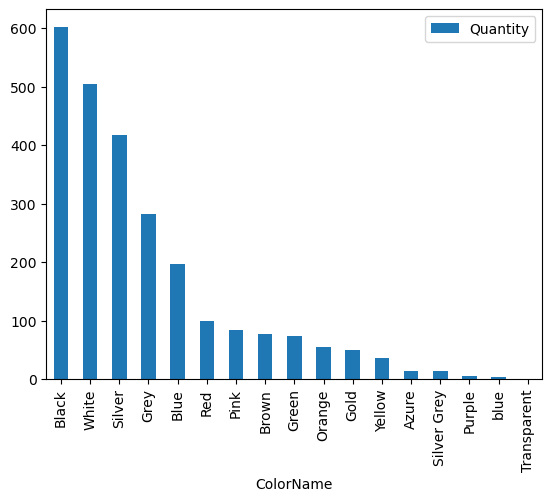

In [9]:
# Create a Color by quantity chart

total_product_by_color.plot(kind = 'bar')

ColorName
Azure          203.914286
Black          298.735930
Blue           425.558173
Brown          591.059870
Gold           287.587600
Green          670.281892
Grey           292.085018
Orange         481.312545
Pink           282.462619
Purple          79.645000
Red            329.317374
Silver         387.500163
Silver Grey    427.014286
Transparent      2.940000
White          366.626317
Yellow          88.819722
blue            89.630000
Name: UnitPrice, dtype: float64


<AxesSubplot:xlabel='ColorName'>

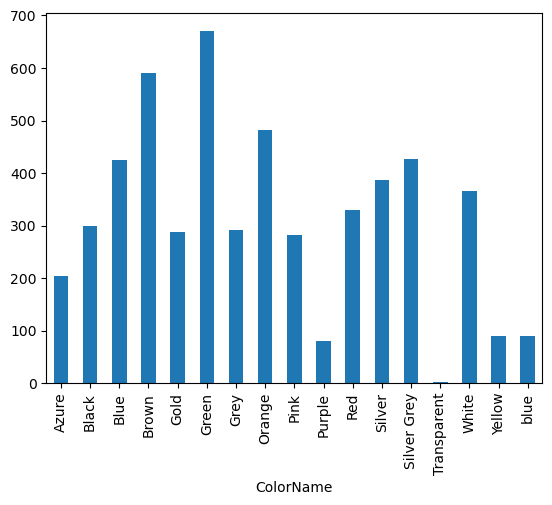

In [12]:
# Founding the average of the price by color

average_price_by_color = data.groupby('ColorName')['UnitPrice'].mean()

print(average_price_by_color)

average_price_by_color.plot(kind='bar')